In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

1. Загрузка данных.

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Проверю на пропуски и типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Удаление всех пропущенные значения и категориальных переменных. Обучение модели. Подсчет метрики качества.

In [ ]:
# 1. Удалю категориальные переменные, и столбец PassengerId, так как все значения в нем уникальные
data_clear = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', ]]
data_clear

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
# 2. Удаление пропусков в данных
data_clear = data_clear.dropna()
data_clear

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [ ]:
# Еще раз посмотрю описание датасета
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [ ]:
# Выделим признаки и целевую переменную
X = data_clear[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_clear[['Survived']]

In [ ]:
# Создадим пайплайн для масштабирования данных и обучения модели
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
# Деление данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Обучение модели
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Метрика Accuracy на тестовых данных
score_before = model.score(X_test, y_test)
score_before

0.7069767441860465

3. Вернемся к первоначальным данным.
Запишу для себя значение столбцов:
* PassengerId - уникальный номер каждого пассажира
* Survived - категория пассажира: 1 - выжил, 0 - погиб
* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший)
* Name — имя
* Sex — пол
* Age — возраст
* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
* Parch — количество родителей, детей (в том числе приемных) на борту титаника
* Ticket — номер билета
* Fare — плата за проезд
* Cabin — каюта
* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4. Удаление признаков, которые логически не нужны для построения модели. Обоснование.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
len(data['PassengerId'].unique()), len(data['Name'].unique()), len(data['Ticket'].unique())

(891, 891, 681)

Удаляю признаки 'PassengerId', 'Name', так это признаки содержат только уникальные значения и не несут никакой полезной нагрузки для обучения модели.

Также удалю признак 'Ticket'. В нем не только уникальны значения, но уникальных значений в нем достаточно много, близко к длине датасета. С одной стороны преобразование его в числовую переменную даст нам 681 признак в датасете, что может понизить качество обучения. Во-вторых этот признак также близок к индентификаторам пассажиров, а не равен он длине датасета видимо из-за того, что некоторые номера билетов принадлежат нескольким людям (вероятно у детей и их родителей билеты с одним номером).

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True)

5. Работа с пропусками.

In [ ]:
# Выведу название столбцов, где есть пропуски
null_list = []
for el in list(data.columns.values):
  if data[el].isnull().sum() != 0:
    null_list.append(el)
print(f'Список столбоцв с пропусками  - {null_list}.')

Список столбоцв с пропусками  - ['Age', 'Cabin', 'Embarked'].


In [ ]:
# Процент потери данных при удалении пропусков в указанных столбцах составит
for i in null_list:
  print(f'Процент потери данных при удалении пропусков из столбца {i} - {round((data[i].isnull().sum()/len(data))*100, 2)}%.')

Процент потери данных при удалении пропусков из столбца Age - 19.87%.
Процент потери данных при удалении пропусков из столбца Cabin - 77.1%.
Процент потери данных при удалении пропусков из столбца Embarked - 0.22%.


Заполнение пропусков. Начну с попроще. В столбце 'Embarked' пропущено всего два значения. Посмотрим на уникальные значения в этом столбце.

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Подавляющее большинство пассажиров село в порту S — Саутгемптон. Заполню два пропуска этим значением.

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Поработаем с признаком 'Cabin'.

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
data.info(), len(data['Cabin'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


(None, 148)

В столбце 'Cabin' 77% пропущенных значений. Заполнено 204 значения из 891. Из 204 значений - 148 уникальных. Даже перечень всех кабин неизвестен. Попробую произвести замену пустых значений на 0, не пустых - на 1.

In [ ]:
# Замена на 1 в ячейках, где нет пропусков
data.loc[data['Cabin'].notnull(), 'Cabin'] = 1

In [ ]:
# Замена пропусков на 0
data['Cabin'] = data['Cabin'].fillna(0)

Поработаем с признаком 'Age'.

Пропуски в данных по возрасту будем заменять средним значением. Но не по всем данным, предположу, что в 1 классе, более престижном, клиенты имеют более высокий средний возраст, чем во 2 классе. Аналогично, для 2 и 3 класса. Проверим предположение.

При этом средний возраст будем рассчитывать для каждого пола в отдельности.

In [ ]:
# Средний возраст для пассажиров 1 класса в разрезе пола
data[data['Pclass'] == 1].groupby(['Sex']).agg({'Age':['mean']})

,Age
,mean
Sex,
female,34.611765
male,41.281386


In [ ]:
mean_age_c1_male = data[data['Pclass'] == 1].groupby(['Sex']).agg({'Age':['mean']}).iloc[1][0]
mean_age_c1_female = data[data['Pclass'] == 1].groupby(['Sex']).agg({'Age':['mean']}).iloc[0][0]

In [ ]:
# Средний возраст для пассажиров 2 класса в разрезе пола
data[data['Pclass'] == 2].groupby(['Sex']).agg({'Age':['mean']}).reset_index()

,Sex,Age
,,mean
0,female,28.722973
1,male,30.740707


In [ ]:
mean_age_c2_male = data[data['Pclass'] == 2].groupby(['Sex']).agg({'Age':['mean']}).iloc[1][0]
mean_age_c2_female = data[data['Pclass'] == 2].groupby(['Sex']).agg({'Age':['mean']}).iloc[0][0]

In [ ]:
# Средний возраст для пассажиров 3 класса в разрезе пола
data[data['Pclass'] == 3].groupby(['Sex']).agg({'Age':['mean']}).reset_index()

,Sex,Age
,,mean
0,female,21.750000
1,male,26.507589


In [ ]:
mean_age_c3_male = data[data['Pclass'] == 3].groupby(['Sex']).agg({'Age':['mean']}).iloc[1][0]
mean_age_c3_female = data[data['Pclass'] == 3].groupby(['Sex']).agg({'Age':['mean']}).iloc[0][0]

Действительно, предположение оказалось верно. Используем эти цифры для заполнения пропусков в столбце 'Age'.

In [ ]:
data.loc[((data['Pclass'] == 1) & (data['Sex'] == 'male')), 'Age'] = data.loc[((data['Pclass'] == 1) & (data['Sex'] == 'male')), 'Age'].fillna(mean_age_c1_male)
data.loc[((data['Pclass'] == 1) & (data['Sex'] == 'female')), 'Age'] = data.loc[((data['Pclass'] == 1) & (data['Sex'] == 'female')), 'Age'].fillna(mean_age_c1_female)
data.loc[((data['Pclass'] == 2) & (data['Sex'] == 'male')), 'Age'] = data.loc[((data['Pclass'] == 2) & (data['Sex'] == 'male')), 'Age'].fillna(mean_age_c2_male)
data.loc[((data['Pclass'] == 2) & (data['Sex'] == 'female')), 'Age'] = data.loc[((data['Pclass'] == 2) & (data['Sex'] == 'female')), 'Age'].fillna(mean_age_c2_female)
data.loc[((data['Pclass'] == 3) & (data['Sex'] == 'male')), 'Age'] = data.loc[((data['Pclass'] == 3) & (data['Sex'] == 'male')), 'Age'].fillna(mean_age_c3_male)
data.loc[((data['Pclass'] == 3) & (data['Sex'] == 'female')), 'Age'] = data.loc[((data['Pclass'] == 3) & (data['Sex'] == 'female')), 'Age'].fillna(mean_age_c3_female)

Проверим еще раз датафрейм на пропуски.

In [ ]:
null_list_2 = []
for el in list(data.columns.values):
  if data[el].isnull().sum() != 0:
    null_list.append(el)
print(f'Список столбоцв с пропусками  - {null_list_2}.')

Список столбоцв с пропусками  - [].


6. Преобразование категориальных признаков в числовые.

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [ ]:
# У нас два категориальных признака 'Sex', 'Embarked', посмотри на уникальные значения
data['Sex'].unique(), data['Embarked'].unique()

(array(['male', 'female'], dtype=object), array(['S', 'C', 'Q'], dtype=object))

Для преобразования 'Sex' используем LabelEncoder, для 'Embarked' - get_dummies.

In [ ]:
# Преобразование столбца 'Sex'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
# Преобразование столбца 'Embarked'
data = pd.get_dummies(data, columns = ['Embarked'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    int64  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


Пропусков нет. Категориальные признаки преобразованы.

7. Проверка на наличие выбросов.

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


In [ ]:
import seaborn as sns

<Axes: ylabel='Age'>

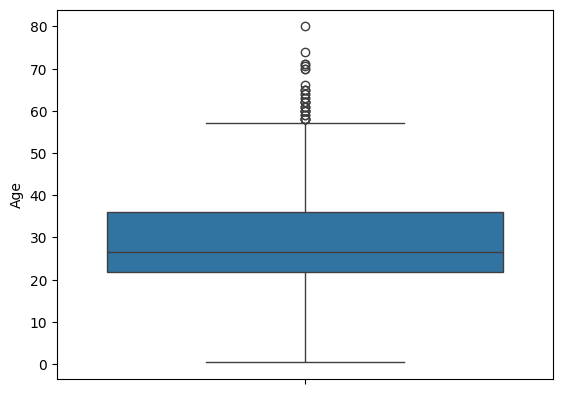

In [ ]:
# Построим boxplot для 'Age'
sns.boxplot(data = data['Age'])

Вероятно, выбросы образовались из-за маленьких детей, которые есть в сипске. Не считаю целесообразным удалять их, так как с одной стороны, тогда вероятно появятся выбросы с обратной стороны. Во-вторых на реальных данных, модель обученная на таких данных может не лучшим образом работать.

<Axes: >

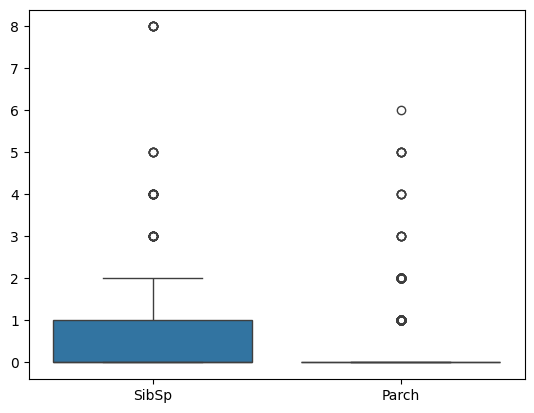

In [ ]:
# Построим boxplot для 'SibSp', 'Parch'
sns.boxplot(data = data[['SibSp', 'Parch']])

Вероятно выбросы связаны с тем, что большинство пассажиров имели только супругу или только одного брата или сестру (SibSp). Тоже самое можно сказать по количеству детей, родителей (Parch). Это не похоже на аномалии, это реальная картина. Обученная модель на данных после удаления этих пропусков также может некачественно работать на реальных данных.

<Axes: ylabel='Fare'>

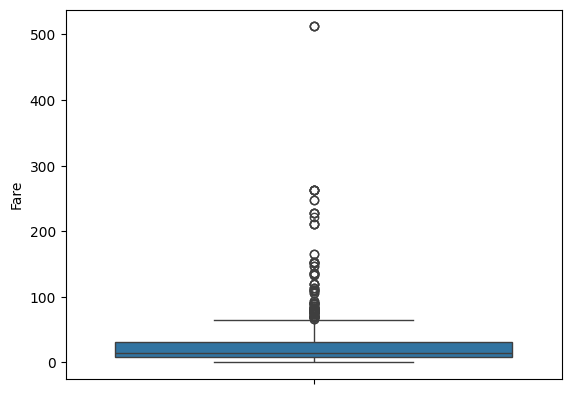

In [ ]:
# Построим boxplot для 'Fare'
sns.boxplot(data = data['Fare'])

In [ ]:
data[data['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
258,1,1,0,35.0,0,0,512.3292,0,1,0,0
679,1,1,1,36.0,0,1,512.3292,1,1,0,0
737,1,1,1,35.0,0,0,512.3292,1,1,0,0


У нас есть три значения в датафрейме с неприлично высокой стоимостью проезда. Но не могу найти причин, чтобы считать это аномалией и удалять их.

Остальные столбцы проверять на выбросы не имеет смысла.

8. Построить 1-2 графика на выбор.

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.00,1,0,7.2500,0,0,0,1
1,1,1,0,38.00,1,0,71.2833,1,1,0,0
2,1,3,0,26.00,0,0,7.9250,0,0,0,1
3,1,1,0,35.00,1,0,53.1000,1,0,0,1
4,0,3,1,35.00,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,0,0,0,1
887,1,1,0,19.00,0,0,30.0000,1,0,0,1
888,0,3,0,21.75,1,2,23.4500,0,0,0,1
889,1,1,1,26.00,0,0,30.0000,1,1,0,0


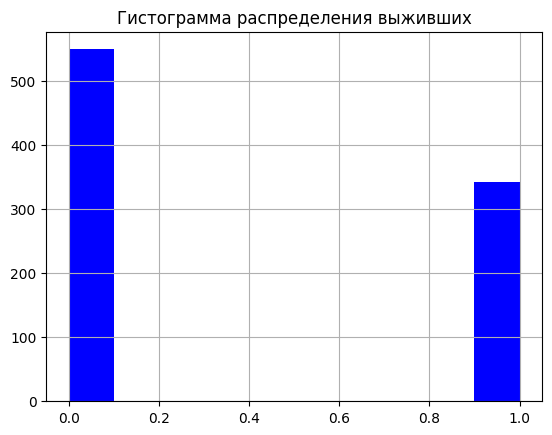

In [ ]:
# Построим гистограмму распределения по выжившим пассажирам
plt.hist(data['Survived'], color='blue')
plt.title('Гистограмма распределения выживших')
plt.grid()
plt.show()

Есть некоторый дисбаланс данных в сторону погибших, их ощутимо больше.

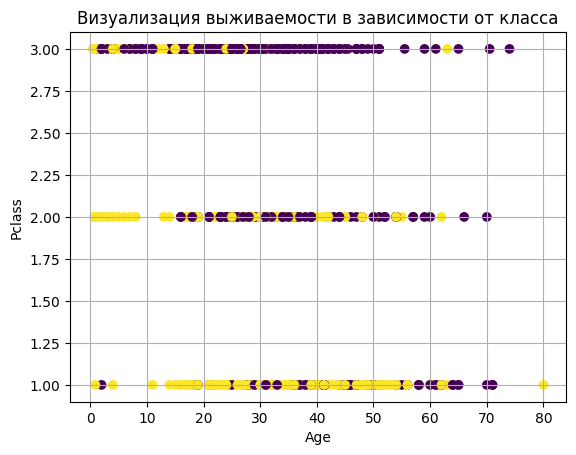

In [ ]:
# Хочу визуализировать выживших в зависимости от класса и возраста
plt.scatter(data['Age'], data['Pclass'], c = data['Survived'])
plt.title('Визуализация выживаемости в зависимости от класса')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.grid()
plt.show()

На этом график видно во-первых смещение в среднего возраста в зависимости от класса, чем выше класс - тем выше средний возраст. Во-вторых можно пронаблюдать, что количество виживших по отношению к погибшим снижается при понижении класса пассажиров.

9. Попробуйте математически преобразовать признак Age.

In [ ]:
# Добавим столбце с преборазованием столбца Age в виде логарифма
data['Log Age'] = data['Age'].apply(lambda x: 0 if x == 0 else np.log(x))

10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Log Age
0,0,3,1,22.00,1,0,7.2500,0,0,0,1,3.091042
1,1,1,0,38.00,1,0,71.2833,1,1,0,0,3.637586
2,1,3,0,26.00,0,0,7.9250,0,0,0,1,3.258097
3,1,1,0,35.00,1,0,53.1000,1,0,0,1,3.555348
4,0,3,1,35.00,0,0,8.0500,0,0,0,1,3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,0,0,0,1,3.295837
887,1,1,0,19.00,0,0,30.0000,1,0,0,1,2.944439
888,0,3,0,21.75,1,2,23.4500,0,0,0,1,3.079614
889,1,1,1,26.00,0,0,30.0000,1,1,0,0,3.258097


In [ ]:
y1 = data[['Survived']]

In [ ]:
X1 = data[['Pclass', 'Sex', 'Log Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [ ]:
# Делим данные на обучающую и тестовую выборку
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
# Обучаем модель
model.fit(X1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Метрика Accuracy после работы с данными
score_after = model.score(X1_test, y1_test)
score_after

0.8208955223880597

In [ ]:
# Метрика Accuracy до работы с данными
score_before

0.7069767441860465

Выводы:
1. В ходе выполнения домашнего задания произвел очистку данных. Обучил модель на первичных данных и на данных после очистки. В ходе очистки данных: удалил ненужные признаки, для оставшихся признаков произвел заполнение пропусков, заменил категориальные признаки числовыми и проверил данные на выбросы.
2. Метрика на очищенных данных выроса примерно на 11,5%.
3. Судя по тому, что метрика изменилась в лучшую сторону - данная работа необходима и полезна. Что касаетсяя действительно больших данных - уверен, что там тоже требуется работа по очистке данных, но скорее всего проводится она как-то по другому, возможно большая часть проверок и очистки автоматизируется.